#  The F test by resampling

See also: https://bic-berkeley.github.io/psych-214-fall-2016/hypothesis_tests.html

In [1]:
# Import numerical, data and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Only show 6 decimals when printing
np.set_printoptions(precision=4)

In [2]:
%matplotlib inline

Our little dataset:

In [3]:
psychos = pd.read_csv('psycho_students.csv')
psychos

,psychopathy,clammy,university
0,11.416,0.389,Berkeley
1,4.514,0.200,Berkeley
2,12.204,0.241,Berkeley
3,14.835,0.463,Berkeley
4,8.416,4.585,Stanford
5,6.563,1.097,Stanford
6,17.343,1.642,Stanford
7,13.020,4.972,Stanford
8,15.190,7.957,MIT
9,11.902,5.585,MIT


The first four students were from Berkeley, the second group of four were from Stanford, and the third group were from MIT.

First we subtract the mean:

In [4]:
psychopathy = psychos['psychopathy']
psychos['psy_mean0'] = psychos['psychopathy'] - psychos['psychopathy'].mean()
psychos

,psychopathy,clammy,university,psy_mean0
0,11.416,0.389,Berkeley,-1.954667
1,4.514,0.200,Berkeley,-8.856667
2,12.204,0.241,Berkeley,-1.166667
3,14.835,0.463,Berkeley,1.464333
4,8.416,4.585,Stanford,-4.954667
5,6.563,1.097,Stanford,-6.807667
6,17.343,1.642,Stanford,3.972333
7,13.020,4.972,Stanford,-0.350667
8,15.190,7.957,MIT,1.819333
9,11.902,5.585,MIT,-1.468667


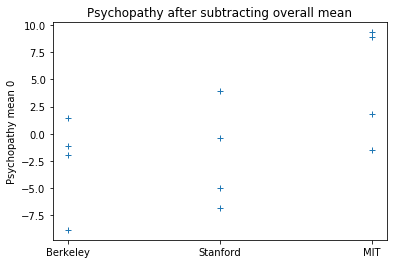

In [5]:
plt.plot(psychos['university'], psychos['psy_mean0'], '+')
plt.ylabel('Psychopathy mean 0')
plt.title('Psychopathy after subtracting overall mean');

Now we get the means for each of the groups:

In [6]:
means = psychos.groupby('university').mean()
means

,psychopathy,clammy,psy_mean0
university,,,
Berkeley,10.74225,0.32325,-2.628417
MIT,18.03425,6.50825,4.663583
Stanford,11.33550,3.07400,-2.035167


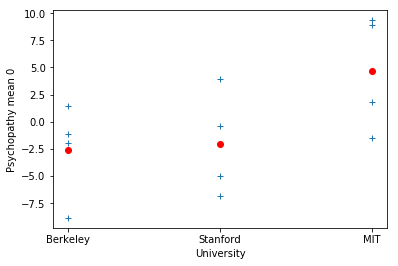

In [7]:
plt.plot(psychos['university'], psychos['psy_mean0'], '+')
plt.xlabel('University')
plt.ylabel('Psychopathy mean 0')
plt.plot(means.index, means['psy_mean0'], 'ro')

Next we ask the question - are the means of the groups convincingly different from zero?

In [8]:
berk_m0, mit_m0, stan_m0 = means['psy_mean0']

In [9]:
sum_sq_mean = (berk_m0 ** 2 + 
               mit_m0 ** 2 + 
               stan_m0 ** 2)
sum_sq_mean

32.79948704166667

We are going to work out the sampling distribution, by doing a random shuffle of values across the groups.

In [10]:
fake_psych_m0 = list(psychos['psy_mean0'])
fake_psych_m0

[-1.954666666666668,
 -8.856666666666667,
 -1.166666666666666,
 1.4643333333333342,
 -4.954666666666666,
 -6.807666666666667,
 3.9723333333333333,
 -0.3506666666666671,
 1.8193333333333328,
 -1.4686666666666657,
 9.350333333333333,
 8.953333333333335]

In [11]:
from random import shuffle
shuffle(fake_psych_m0)
fake_psych_m0

[-1.166666666666666,
 -1.954666666666668,
 -4.954666666666666,
 -0.3506666666666671,
 1.8193333333333328,
 -6.807666666666667,
 8.953333333333335,
 -8.856666666666667,
 -1.4686666666666657,
 1.4643333333333342,
 3.9723333333333333,
 9.350333333333333]

Let's get the sampling distribution:

In [12]:
fake_sum_sq_means = []
for i in range(10000):
    np.random.shuffle(fake_psych_m0)
    s_s_m = (np.mean(fake_psych_m0[:4]) ** 2 + 
             np.mean(fake_psych_m0[4:8]) ** 2 + 
             np.mean(fake_psych_m0[8:]) ** 2)
    fake_sum_sq_means.append(s_s_m)

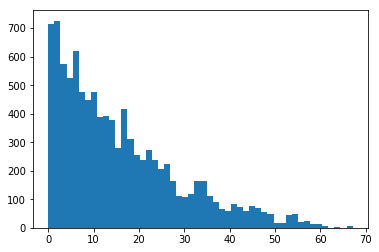

In [13]:
plt.hist(fake_sum_sq_means, bins=50);

What proportion of the sampling distribution is at or above the value that we saw?

In [14]:
n_gt_eq = np.sum(np.array(fake_sum_sq_means) >= sum_sq_mean)
p_gt_eq = n_gt_eq / 10000
p_gt_eq

0.1278